# Importing Required Libraries

In [205]:
# pandas to organize data in tabular form
# numpy to work with multi-dimensional array
# matplotlib is a 2D plotting library
# seaborn for drawing statistical graphs
# StandardScaler and normalize for standardization of data
# kMeans for applying kmeans clustering algorithm
# PCA for dimensionality reduction


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [206]:
# importing Marketing_data datasheet

from google.colab import files
uploaded = files.upload()


Saving Marketing_data.csv to Marketing_data (3).csv


In [207]:
creditcard_df = pd.read_csv('Marketing_data.csv')

In [208]:
# bringing the dataset in creditcard_df dataframe
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


The dataframe consists of 8950 customer data and 17 features + 1 Customer Id
*   BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFFPURCHASES,INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, 
ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT and TENURE are given features. An attempt to segment customers is done on these features only.
*   Out of these, BALANCE_FREQUENCY, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY show frequency score between 0 & 1. (0 - least frequency, 1 - max frequency)




In [209]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Taking a quick glance across dataframe


*   Average of customers balance is 1564 units
*   Balance frequency is frequently updated on average of 0.87

*   Average purchases frequency is around 50%
*   Average of credit limit is 4494 units

*   Percent of full payment is 15%
*   Most of the customers have 12 years of tenure as average tenure is around 11.5%

In [210]:
# Checking customer who paid maximum through Cash Advance 
creditcard_df[creditcard_df['CASH_ADVANCE'] == creditcard_df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


This customer made 123 cash advance transactions, which is huge!

# Dataset Exploration

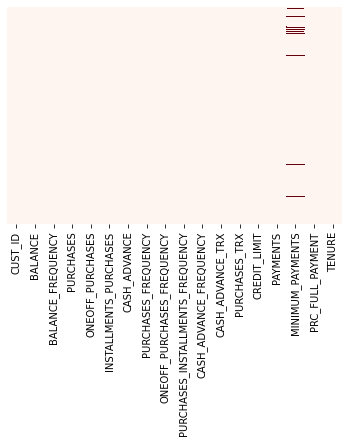

In [211]:
# Checking missing values using heatmap. Red lines are shown above column name where some values are not present

sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Reds')

In [212]:
# MINIMUM_PAYMENTS column seems to miss some data points. 
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [213]:
# Filling up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [214]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [215]:
# Credit_Limit is also missing one value. Lets fill the mean of the same column there.  

creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [216]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [217]:
# To check duplicate entries in data

creditcard_df.duplicated().sum()

0

In [218]:
# Customer Id is only used for identification. The porpose is same as their name and hence can be dropped. 
creditcard_df.drop('CUST_ID', axis = 1 ,inplace=True)

In [219]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [220]:
 n = len(creditcard_df.columns)
 n

17

In [221]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

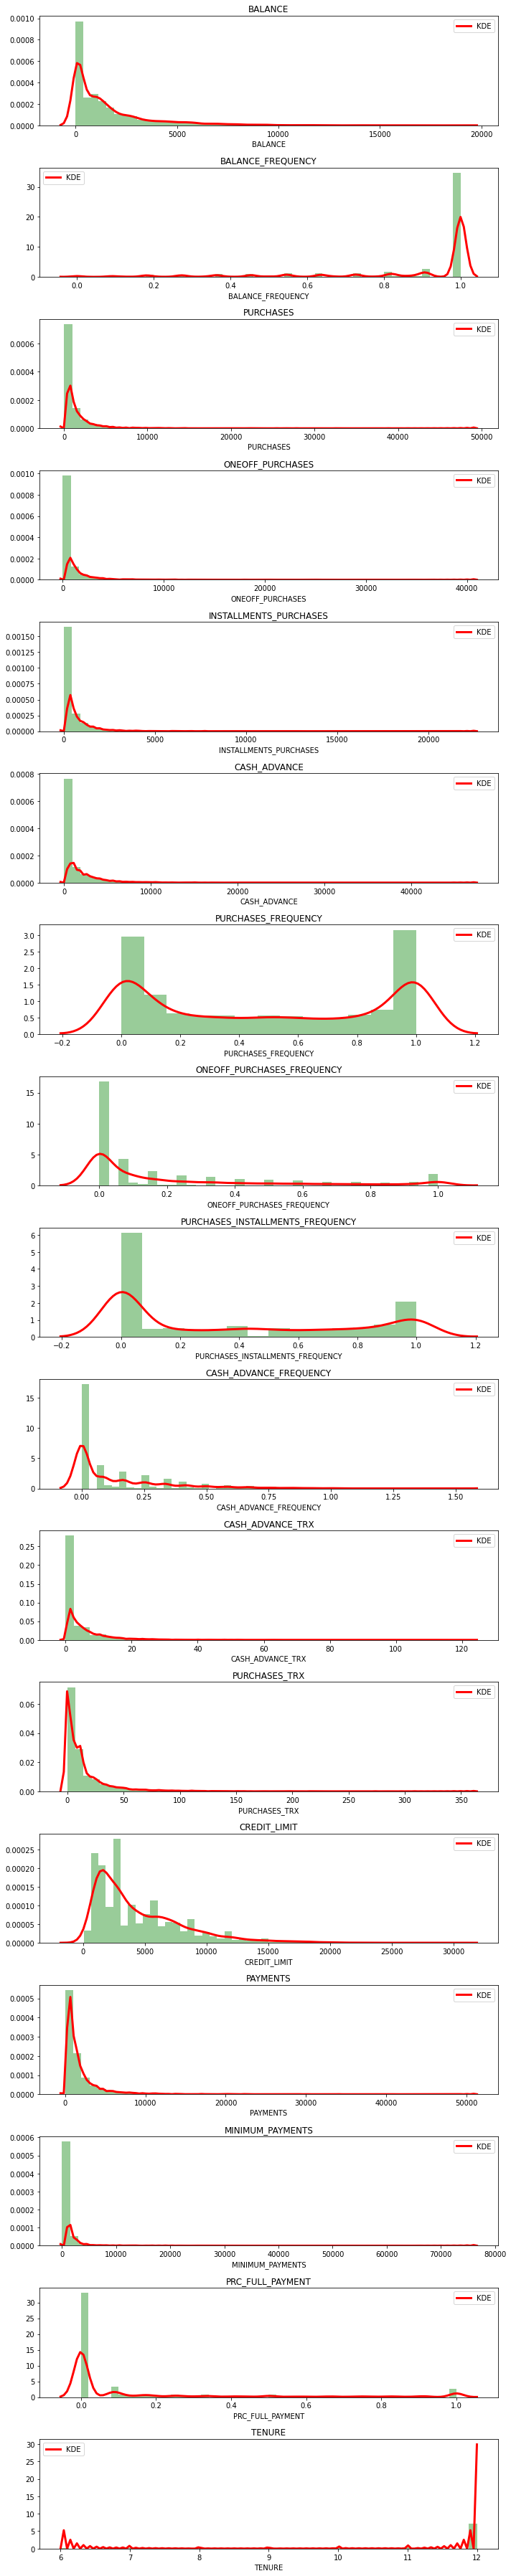

In [222]:
# KDE, which stands for Kernel Density Estimate, is used to visualize Probablity Density of given features

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {'color':'r', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

Observations of above Probablity Density Functions (A General Idea)



*   A Clear peak for Balance shows mean value is between 1,000-2,000

*   Balance is frequently updated for most of the customers

*   A large group of customers show recent purchase in range 1,000-3,000. Only a handful of them have done purchses as high as 50,000

*   Most of the Cash Advance payment is distributed between 1,000 & 5,000

*   Purchase Frequency shows two peaks at 0 & 1. This means there are considerable amount of customers who aren't shopping frequently using our credit card
*   One Off Purchase and Cash Advance frequency is LOW


*   Average of credit limit is around 2,000


*   Most of the customers dont do whole payment in one go


*   Some customers have 0-7 yrs of tenure but most of them are with 12 yrs

In [223]:
# Trying to understand correlation among features

correlations = creditcard_df.corr()

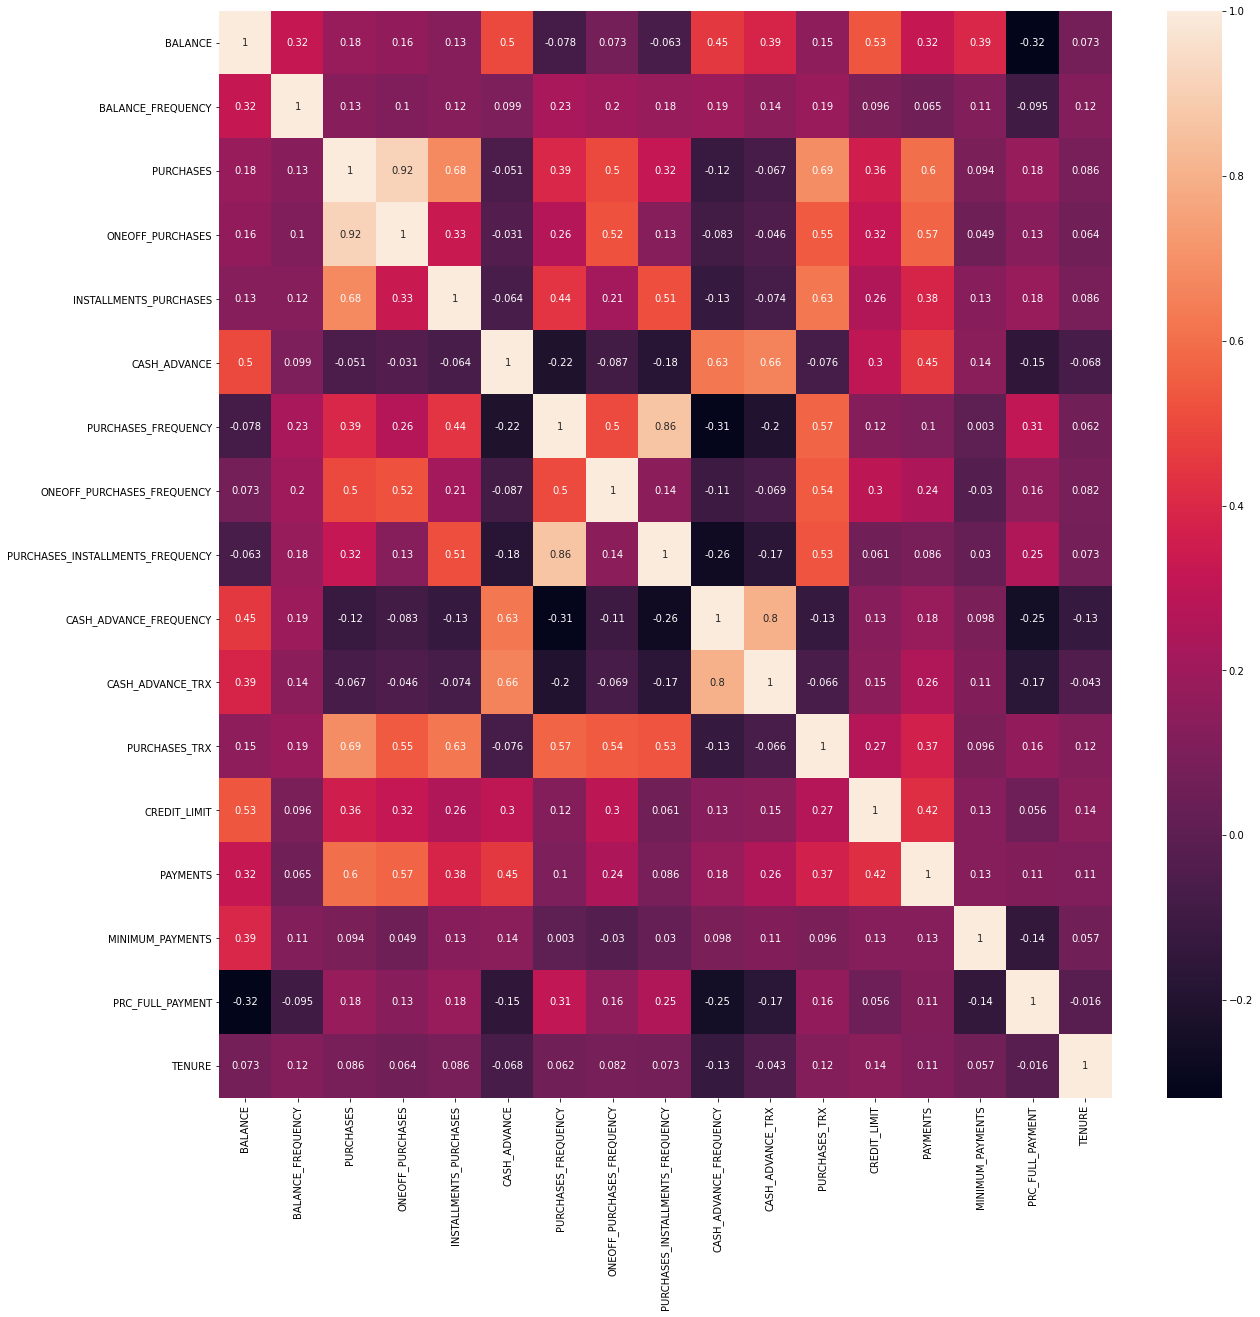

In [224]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)

Notable correlated features



*   Purchase with One Off Purchse & Purchse Transaction

*   Cash Advance and Balance

*   Purchase Frequency and Purchse Installment Frequency
*   List item


*   Tenure shows maximum correation with Credit limit


*   Full payment shows -ve or low correlation with all other features

# Elbow Method is used to find optimal number of clusters

In [225]:
# Since the column values show large variation among themselves. Let's scale the data to be on safe side

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [226]:
# Scaling won't affect number of data points. This is just verification

creditcard_df_scaled.shape

(8950, 17)

In [227]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [228]:
# Applying kmeans algorithm to find optimal number of clusters

score_1 = []
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  score_1.append(kmeans.inertia_)

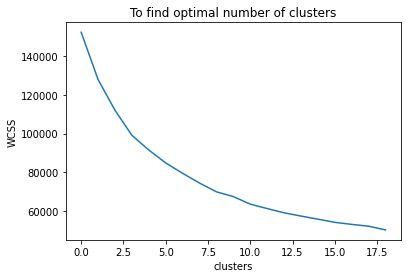

In [229]:
# Plotting WCSS v/s clusters to see elbow point

plt.plot(score_1)
plt.title('To find optimal number of clusters')
plt.xlabel('clusters')
plt.ylabel('WCSS')
plt.show()

Elbow points can be observed at 3 and 8. Since at 3, the slope change is not very steep and after 8, the graph almost converges to straight.


Let's move forward with 8 clusters

# Applying KMeans method

In [230]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [231]:
labels

array([1, 4, 5, ..., 7, 7, 7], dtype=int32)

In [232]:

kmeans.cluster_centers_.shape         

(8, 17)

In [233]:
# Checking center points of 8 clusters taken

cluster_centers =  pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])

In [234]:
# Below table shows all 17 feature values for 8 clusters
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238947,1.290295,0.441655,0.304778,0.334182
1,0.016394,0.403872,-0.361193,-0.246637,-0.400807,-0.091637,-0.863824,-0.409556,-0.755436,0.108551,-0.025753,-0.485758,-0.304053,-0.249824,-0.010029,-0.457146,0.272591
2,-0.364417,0.332971,-0.036559,-0.244227,0.362055,-0.363402,0.993831,-0.387036,1.209408,-0.475162,-0.360971,0.189100,-0.262318,-0.216038,-0.031851,0.316774,0.257278
3,-0.701163,-2.144787,-0.311233,-0.235823,-0.302542,-0.319756,-0.557150,-0.445187,-0.440134,-0.520622,-0.376063,-0.419936,-0.175963,-0.192408,-0.256478,0.283762,0.199336
4,1.689948,0.396143,-0.218924,-0.157453,-0.228441,2.017284,-0.478708,-0.214924,-0.414713,1.922067,1.937125,-0.267579,1.026000,0.808131,0.555558,-0.395159,0.070229
5,-0.164180,0.391845,0.454150,0.593972,-0.017555,-0.332523,0.943768,1.878520,0.089728,-0.406144,-0.322174,0.524871,0.374958,0.087998,-0.162385,0.406347,0.261730
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
7,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733


In [235]:
# Inverse transformation is performed to understand center points better

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539
1,1598.598589,0.972944,231.510749,183.069949,48.622541,786.704973,0.143656,0.080279,0.064208,0.156866,3.073081,2.635696,3388.180928,1009.927778,840.834342,0.020007,11.882115
2,805.971114,0.956148,925.095525,187.071095,738.469069,216.800636,0.889223,0.086997,0.845087,0.040059,0.785465,19.410154,3540.029966,1107.735768,789.978393,0.246366,11.861623
3,105.063837,0.369191,338.250830,201.019898,137.482244,308.328143,0.266740,0.069650,0.189517,0.030962,0.682472,4.271804,3854.224762,1176.141747,266.495312,0.236710,11.784081
4,5081.959655,0.971113,535.471096,331.097001,204.491361,5209.210371,0.298222,0.138342,0.199620,0.519769,16.468281,8.058824,8227.456223,4072.602517,2158.910873,0.038137,11.611303
5,1222.747542,0.970095,1973.502831,1578.309553,395.193279,281.554284,0.869130,0.762857,0.400097,0.053871,1.050228,27.756164,5858.700706,1987.890273,485.775781,0.272564,11.867580
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904


In [236]:
labels.shape

(8950,)

In [237]:
# concatenation of clusters labels to original dataframe

creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


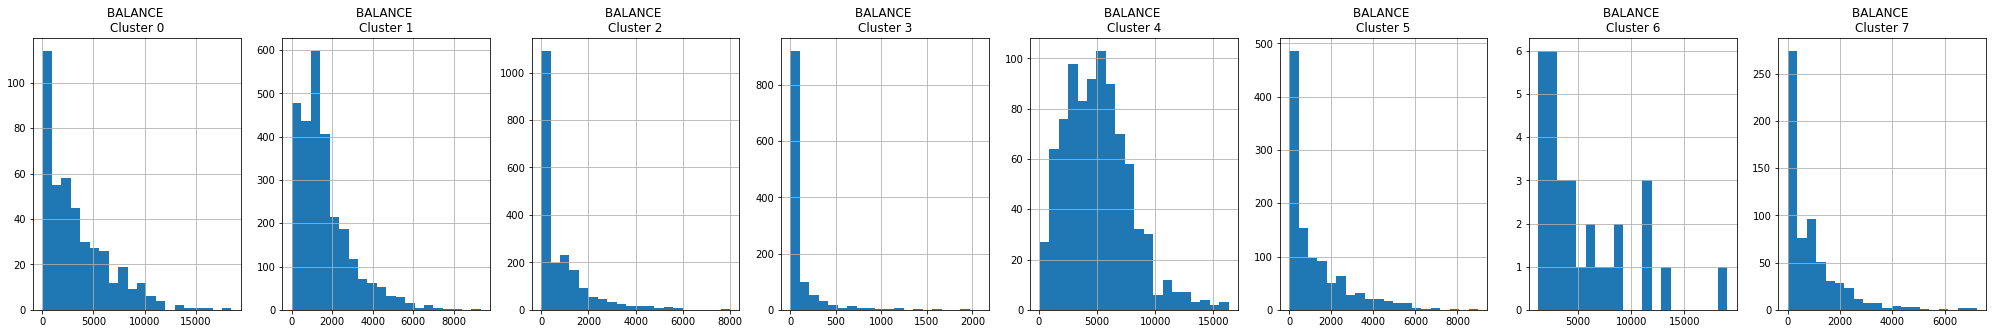

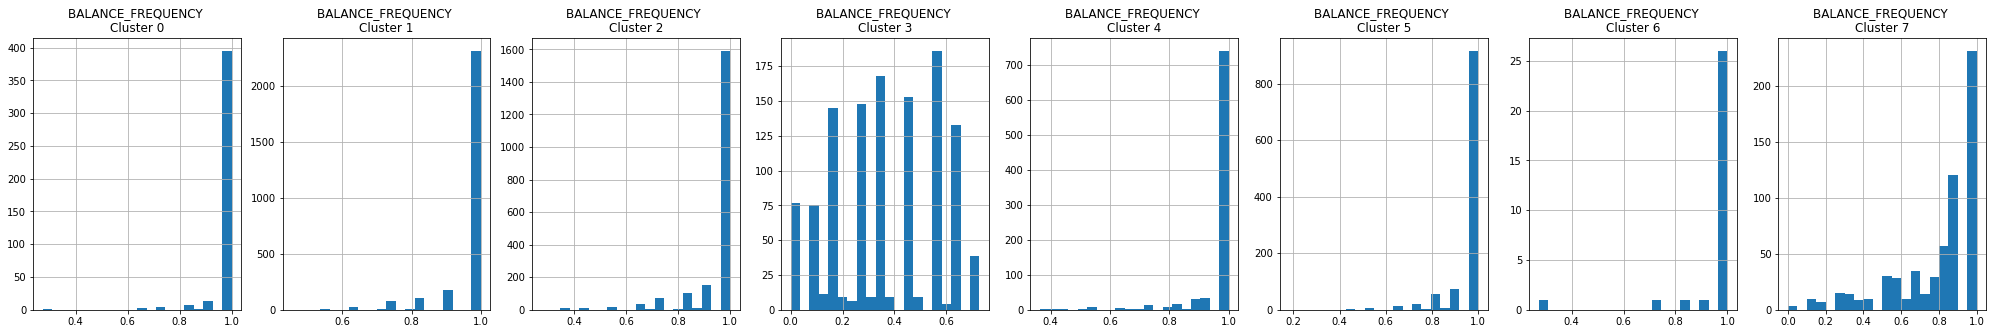

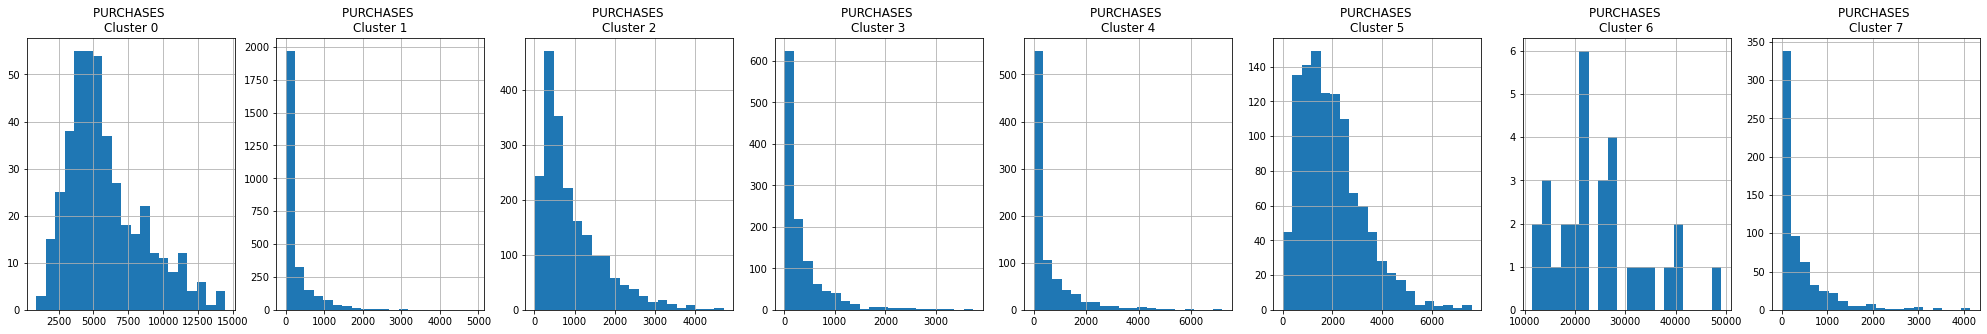

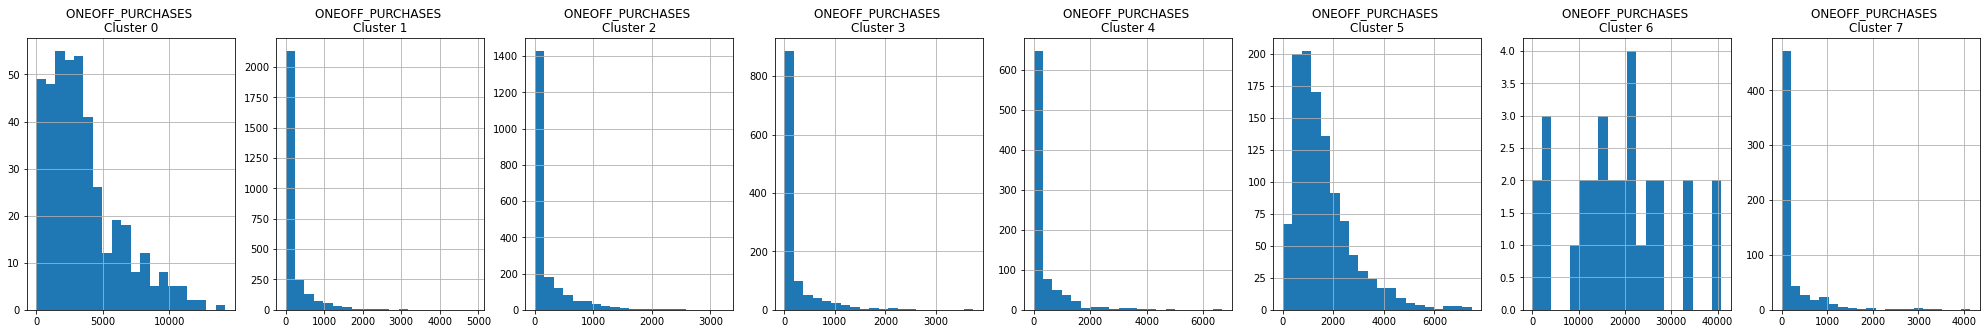

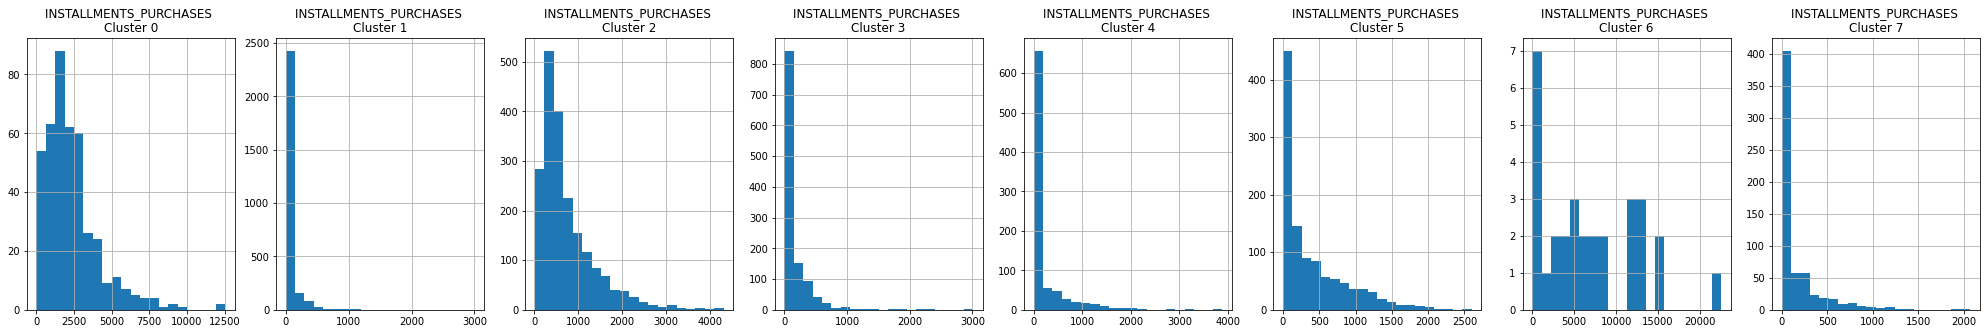

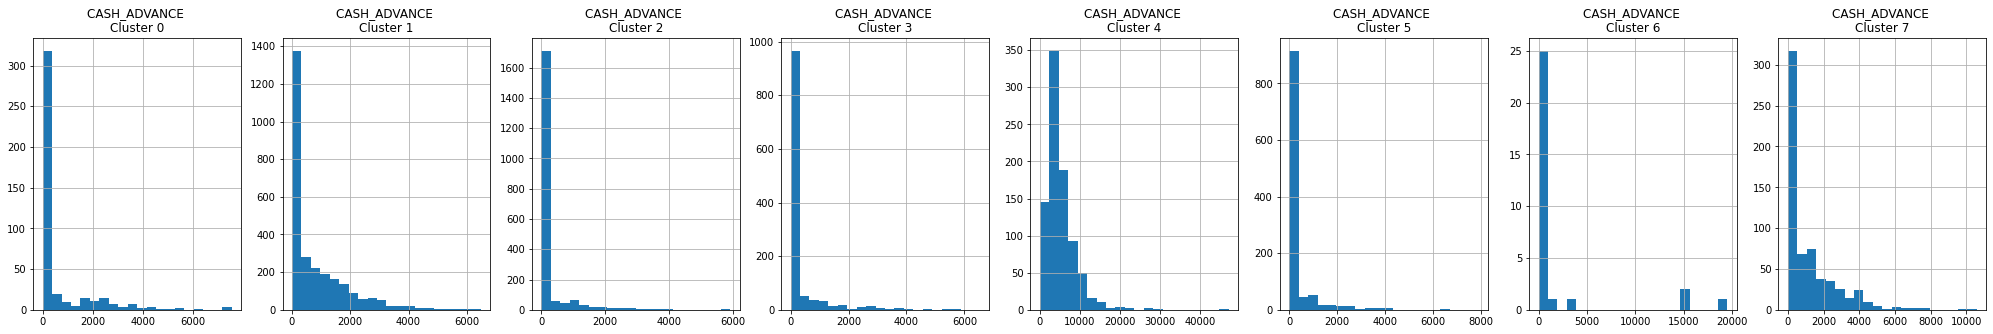

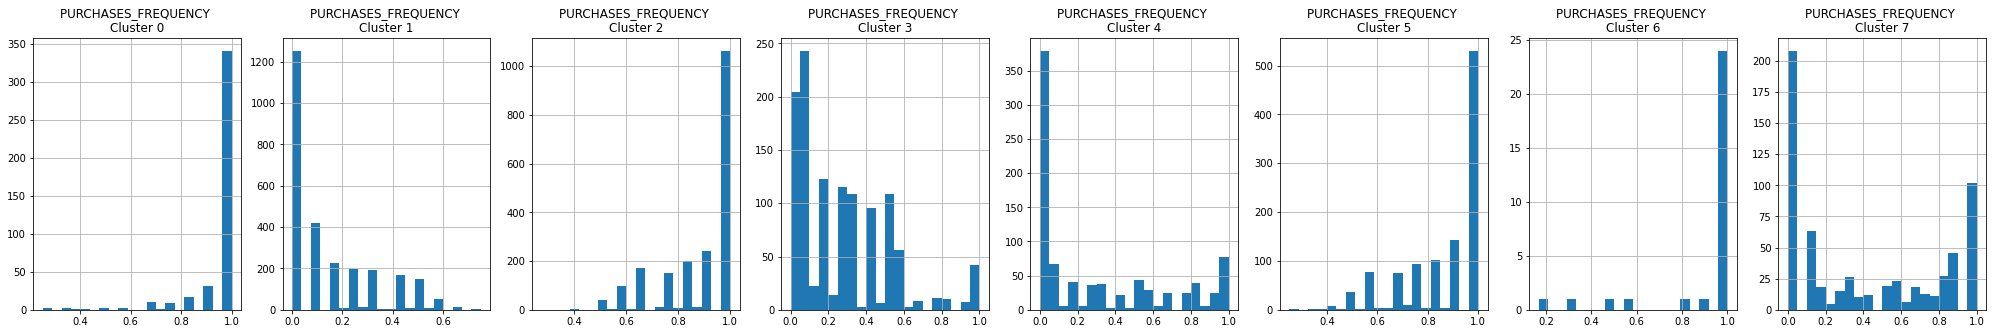

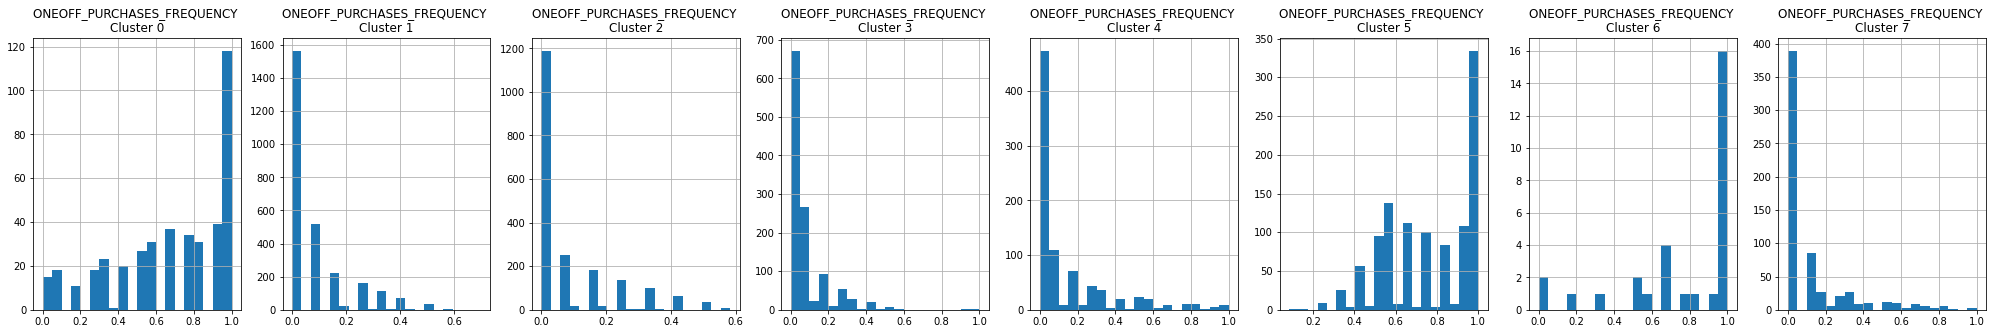

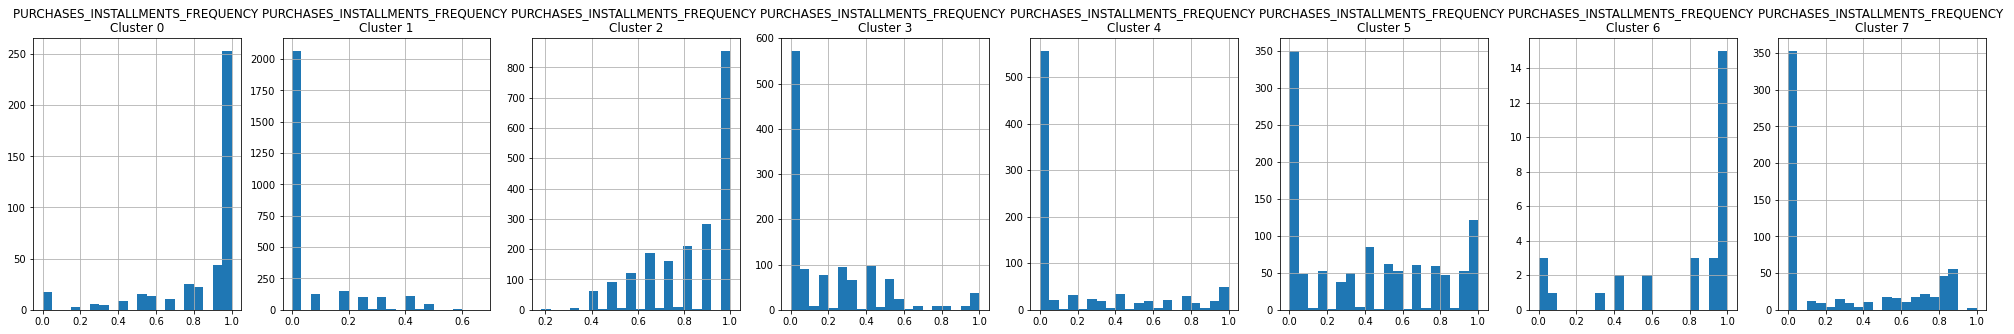

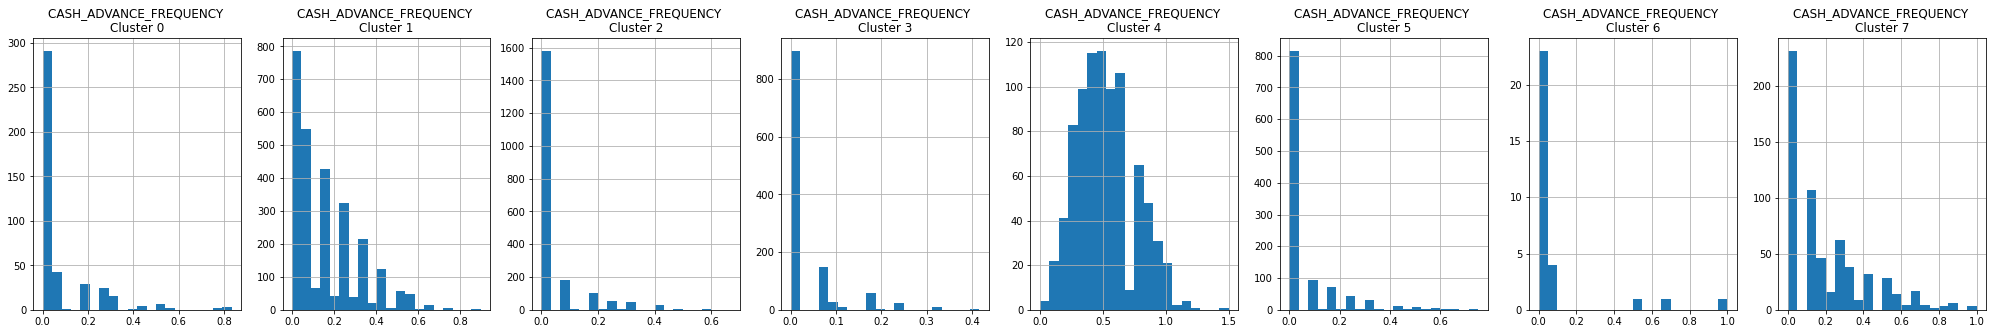

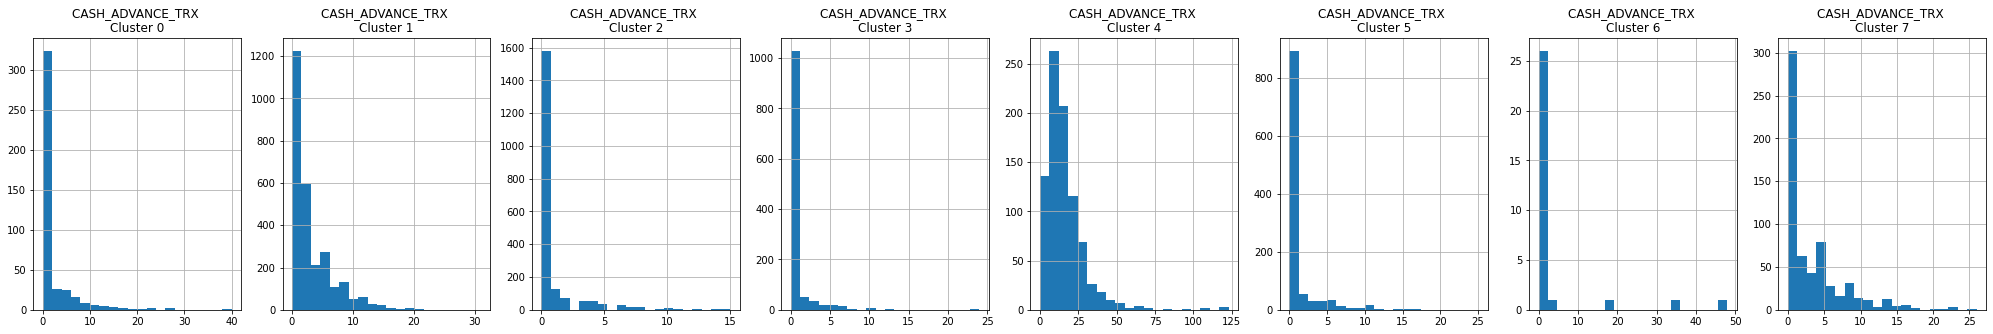

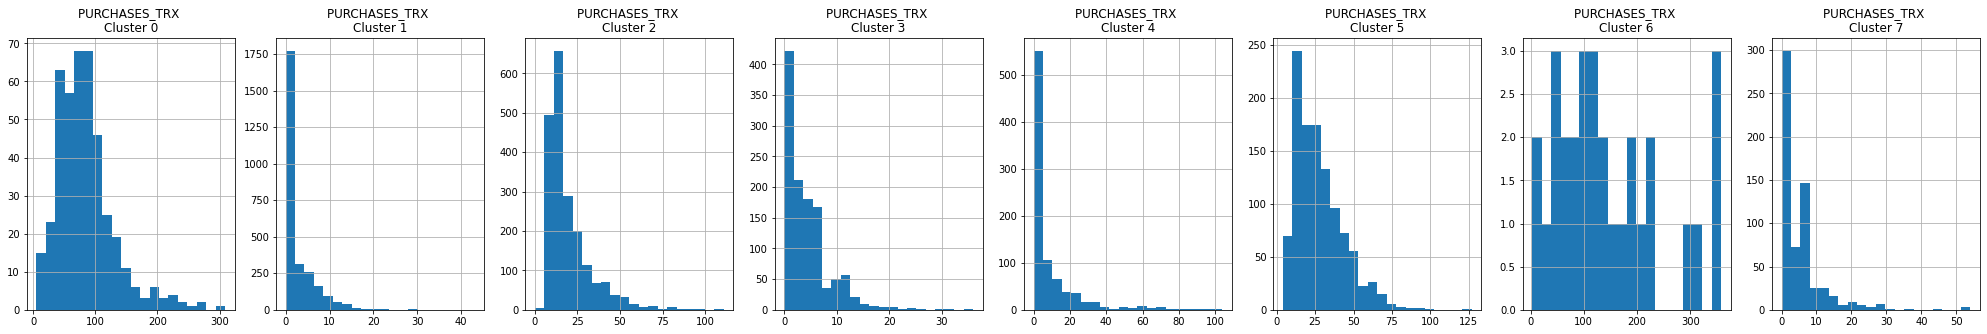

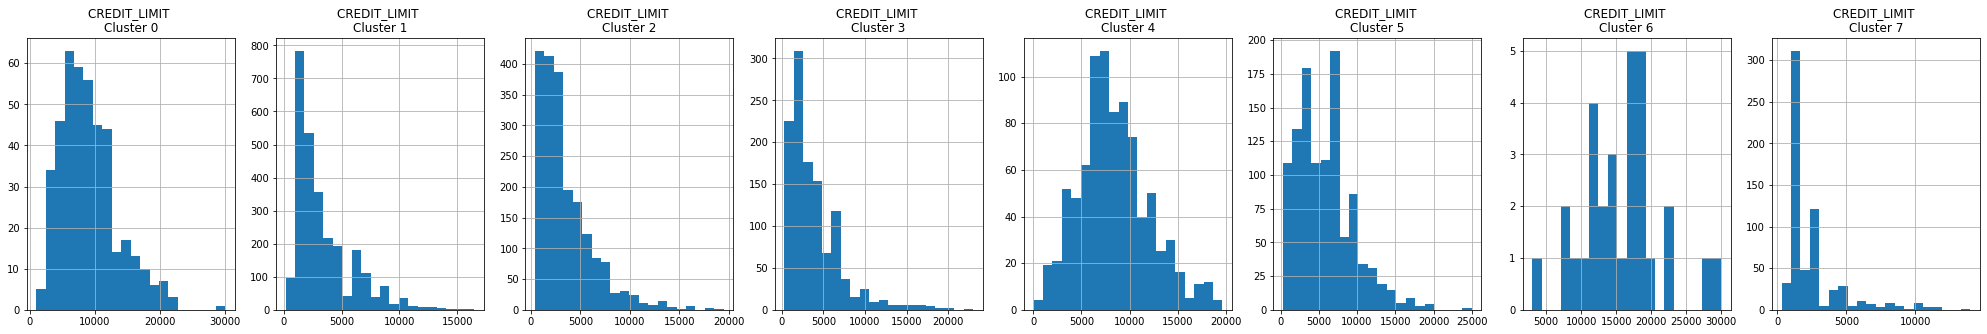

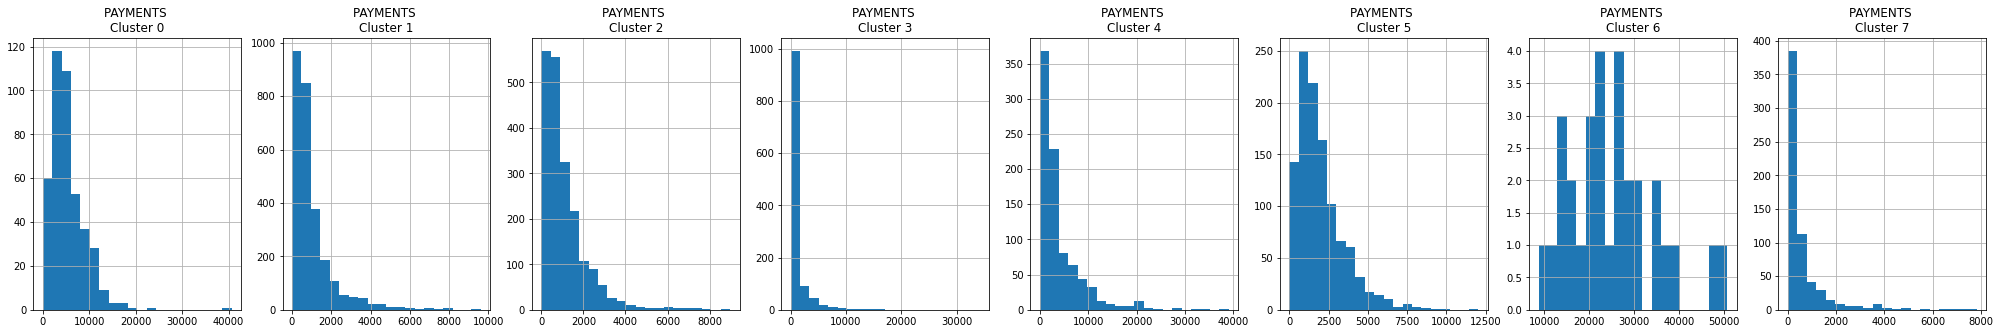

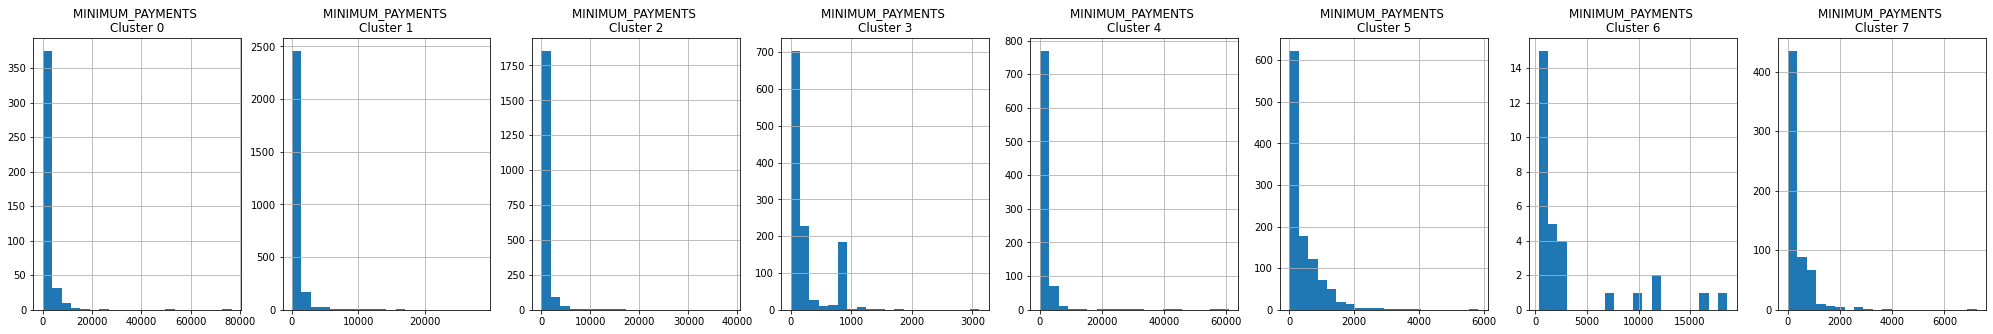

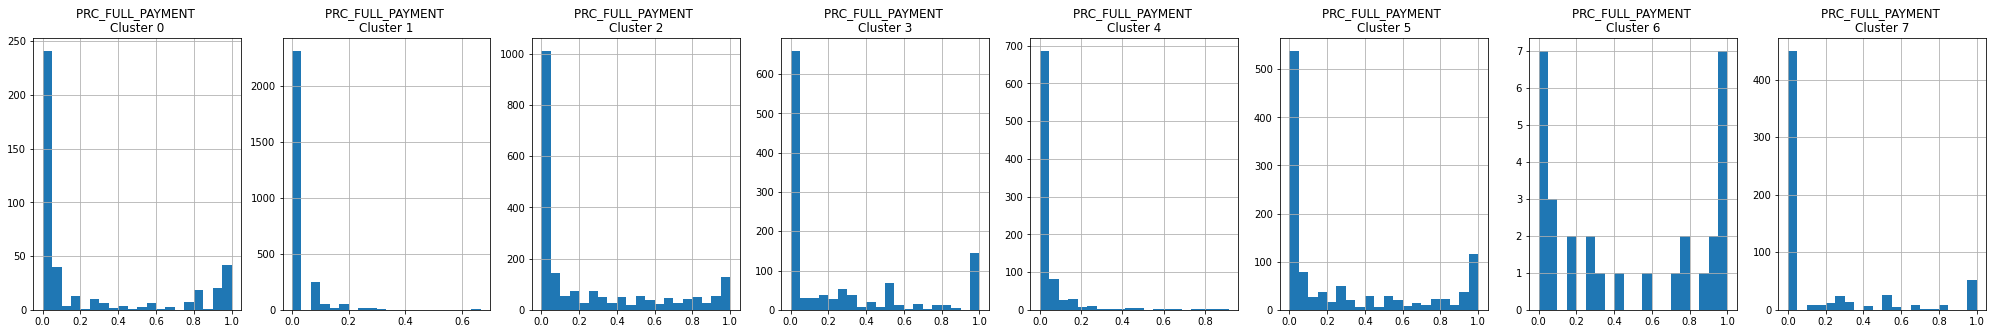

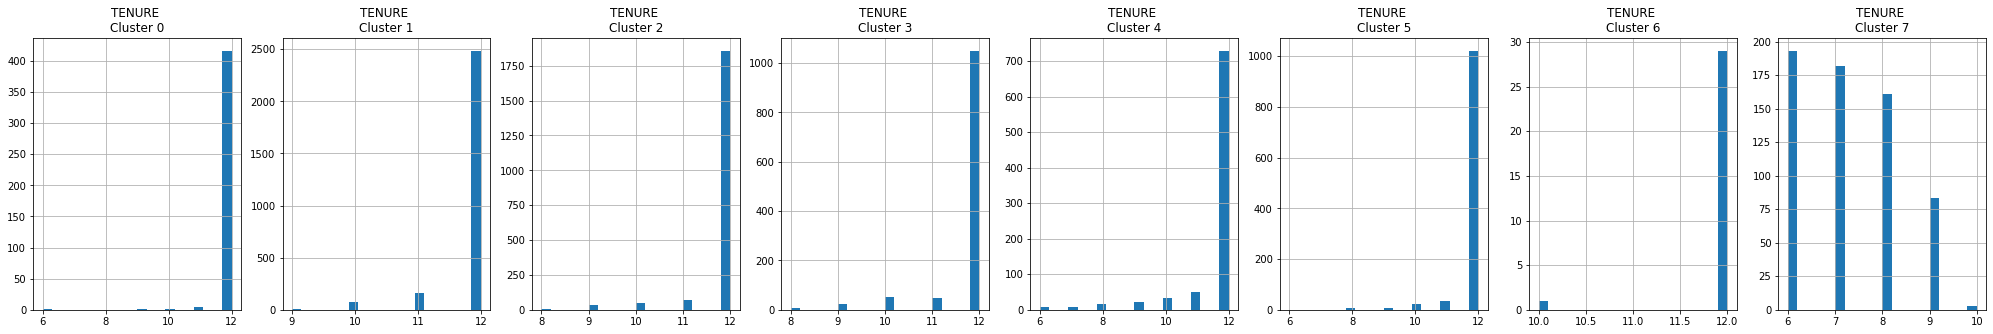

In [238]:
# Plotting histogram of all 8 clusters for all 17 features individually

for i in creditcard_df.columns:
  plt.figure(figsize = (35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i,j))


plt.show()

# To reduce dimensionality, Principal Component Analysis is performed

In [239]:
# Aim is to reduce 17 features to 2 to make the analysis part easier. High correlation among features make PCA perform better
# Obtaining the principal components 

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222091, -1.0764531 ],
       [-1.13829736,  2.50645978],
       [ 0.96968193, -0.38350653],
       ...,
       [-0.926203  , -1.81078305],
       [-2.33654991, -0.65796568],
       [-0.55642086, -0.40046006]])

In [240]:
# Creating a dataframe with the two components

pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076453
1,-1.138297,2.506460
2,0.969682,-0.383507
3,-0.873630,0.043165
4,-1.599434,-0.688583


In [241]:
# Concatenating the clusters labels to the dataframe

pca_df = pd.concat([pca_df, pd.DataFrame({'clusters':labels})], axis=1)
pca_df.head()

,pca1,pca2,clusters
0,-1.682221,-1.076453,1
1,-1.138297,2.506460,4
2,0.969682,-0.383507,5
3,-0.873630,0.043165,1
4,-1.599434,-0.688583,1


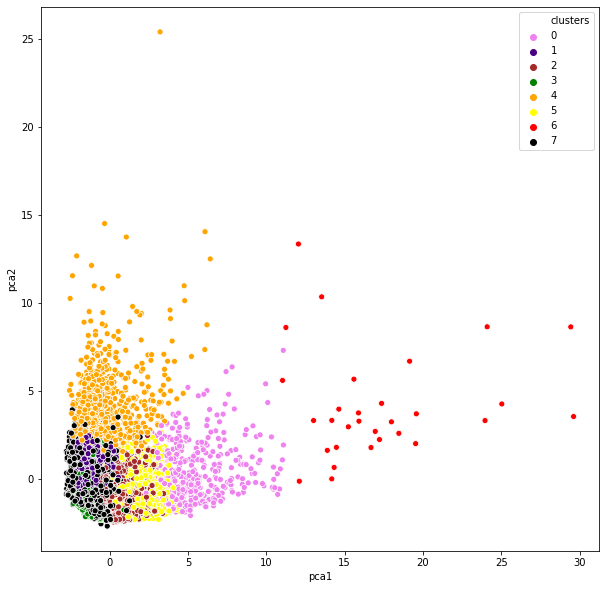

In [242]:
# Lets plot pca1 vs pca2 and observe data points in 8 different clusters

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'clusters', data = pca_df, palette = ['violet','indigo','brown','green','orange','yellow','red','black'])

Different colours here show different clusters which resembles customers belonging to different categories

# Applying Autoencoder to perform dimensionality reduction

In [243]:
# Making use of Google's tensorflow ML library to perform Autoencoding

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [244]:
# Modeling autoencoder layer by layer

# starting with input size of 17
input_df = Input(shape = (17,))

# encoding
x = Dense(7, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer= 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer= 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer= 'glorot_uniform')(x)

# Creating a bottle neck between encoding and decoding sides
encoded = Dense(10, activation = 'relu', kernel_initializer='glorot_uniform')(x)

# decoding
x = Dense(2000, activation = 'relu', kernel_initializer= 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer= 'glorot_uniform')(x)

# Decoded layer must contain same number of features ie 17 again
decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

#autoencoder
autoencoder = Model(input_df, decoded)

#Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [245]:
# trainiing the model with 150 batches and 30 epochs

autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 150, epochs = 30, verbose = 1)

Epoch 1/30
60/60 [==============================] - 3s 56ms/step - loss: 0.5345
Epoch 2/30
60/60 [==============================] - 3s 56ms/step - loss: 0.2906
Epoch 3/30
60/60 [==============================] - 3s 57ms/step - loss: 0.2081
Epoch 4/30
60/60 [==============================] - 3s 56ms/step - loss: 0.1718
Epoch 5/30
60/60 [==============================] - 3s 56ms/step - loss: 0.1510
Epoch 6/30
60/60 [==============================] - 3s 56ms/step - loss: 0.1369
Epoch 7/30
60/60 [==============================] - 3s 56ms/step - loss: 0.1164
Epoch 8/30
60/60 [==============================] - 3s 56ms/step - loss: 0.1068
Epoch 9/30
60/60 [==============================] - 3s 56ms/step - loss: 0.0996
Epoch 10/30
60/60 [==============================] - 3s 57ms/step - loss: 0.0945
Epoch 11/30
60/60 [==============================] - 3s 57ms/step - loss: 0.0908
Epoch 12/30
60/60 [==============================] - 3s 58ms/step - loss: 0.0837
Epoch 13/30
60/60 [==================

In [246]:
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_24 (Dense)             (None, 7)                 126       
_________________________________________________________________
dense_25 (Dense)             (None, 500)               4000      
_________________________________________________________________
dense_26 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_27 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_28 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_29 (Dense)             (None, 2000)              2200

In [247]:
# predictions by encoder

pred = encoder.predict(creditcard_df_scaled)

In [248]:
# bottleneck layer between encoder and decoder contains 10 neurons
pred.shape

(8950, 10)

In [249]:
# Again kmeans algorithm is applied. But this time on above obtained encoder predictions

score_2 = []
range_of_values = range(1,20)

for j in range_of_values:
  kmeans = KMeans(n_clusters = j)
  kmeans.fit(pred)
  score_2.append(kmeans.inertia_)

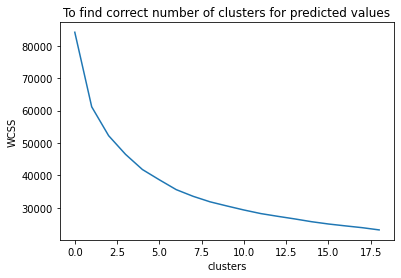

In [250]:
# Elbow method: Clusters v/s WCSS for encoder predictions

plt.plot(score_2)
plt.title('To find correct number of clusters for predicted values')
plt.xlabel('clusters')
plt.ylabel('WCSS')
plt.show()

sharp points at 1, 2 and 4. 4 seems to be the appropriate number of clusters

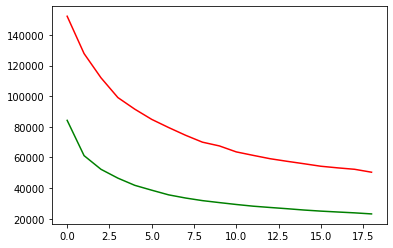

In [251]:
# Comparing kmeans before and after encoder predictions

plt.plot(score_1, color='red')
plt.plot(score_2, color = 'green')

In [252]:
# Moving forward with 4 number of clusters

kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [253]:
# Adding cluster columns to original creditcard_df dataframe

creditcard_df_predictedcluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_predictedcluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [254]:
creditcard_df_predictedcluster.shape

(8950, 18)

In [255]:
# Supporters 

cluster1_df = creditcard_df_predictedcluster[creditcard_df_predictedcluster['cluster'] == 0]
cluster1_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2,2495.148862,1.0,773.17,773.17,0.00,0.000000,1.00,1.000000,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.0,12,0
6,627.260806,1.0,7091.01,6402.63,688.38,0.000000,1.00,1.000000,1.00,0.000000,0,64,13500.0,6354.314328,198.065894,1.0,12,0
21,6369.531318,1.0,6359.95,5910.04,449.91,229.028245,1.00,0.916667,1.00,0.333333,6,92,11250.0,2077.959051,1659.775075,0.0,12,0
37,4047.480828,1.0,2380.55,1642.17,738.38,1697.660901,0.75,0.500000,0.75,0.333333,7,41,5000.0,1617.894416,1541.141605,0.0,12,0
44,5315.945594,1.0,1525.44,469.80,1055.64,0.000000,1.00,0.333333,1.00,0.000000,0,20,8500.0,1430.341501,1318.714920,0.0,12,0


In [256]:
# Alienated 

cluster2_df = creditcard_df_predictedcluster[creditcard_df_predictedcluster['cluster'] == 1]
cluster2_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,1
3,1666.670542,0.636364,1499.00,1499.0,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.0,12,1
4,817.714335,1.000000,16.00,16.0,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,1
5,1809.828751,1.000000,1333.28,0.0,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.0,12,1
7,1823.652743,1.000000,436.20,0.0,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.0,12,1


In [257]:
# Roamers 

cluster3_df = creditcard_df_predictedcluster[creditcard_df_predictedcluster['cluster'] == 2]
cluster3_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.0,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.5,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,2
16,2072.074354,0.875000,0.00,0.00,0.00,2784.274703,0.0,0.000000,0.000000,0.250000,3,0,3000.0,391.974562,376.579631,0.000000,8,2
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.0,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,2
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.0,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,2


In [258]:
# Fans

cluster4_df = creditcard_df_predictedcluster[creditcard_df_predictedcluster['cluster'] == 3]
cluster4_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
71,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12,3
120,8504.876253,1.000000,6724.26,4100.08,2624.18,1686.599777,1.000000,0.916667,1.000000,0.500000,10,85,17000.0,1888.756861,2167.446204,0.000000,12,3
125,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12,3
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12,3
153,13673.079610,1.000000,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.000000,12,3


In [259]:
# verifying that all customers are alloted one cluster group without repetation

cluster1_df.shape[0] + cluster2_df.shape[0] + cluster3_df.shape[0] + cluster4_df.shape[0]

8950

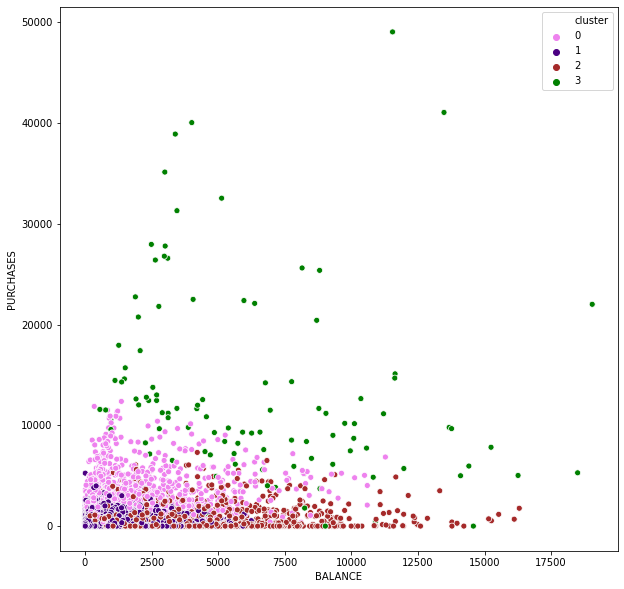

In [260]:
# Balance vs Purchase with clusters

plt.figure(figsize=(10,10))
ax1 = sns.scatterplot(x = 'BALANCE', y = 'PURCHASES', hue = 'cluster', data = creditcard_df_predictedcluster, palette = ['violet','indigo','brown','green'])

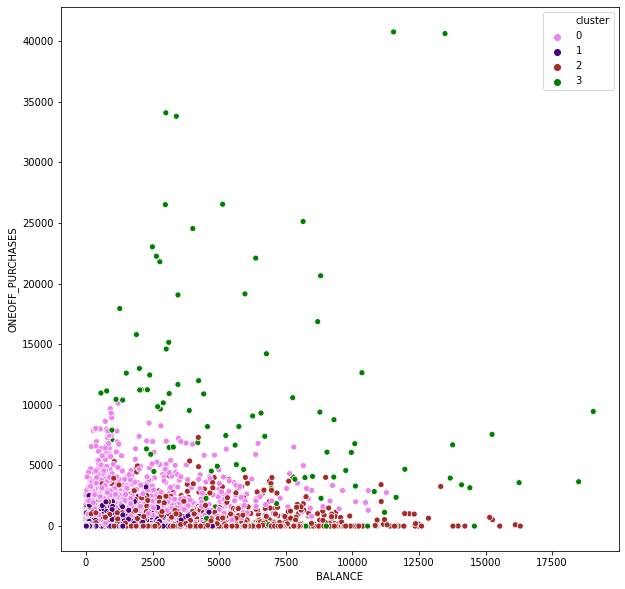

In [261]:
# Balance vs Oneoff purchases with clusters

plt.figure(figsize=(10,10))
ax1 = sns.scatterplot(x = 'BALANCE', y = 'ONEOFF_PURCHASES', hue = 'cluster', data = creditcard_df_predictedcluster, palette = ['violet','indigo','brown','green'])

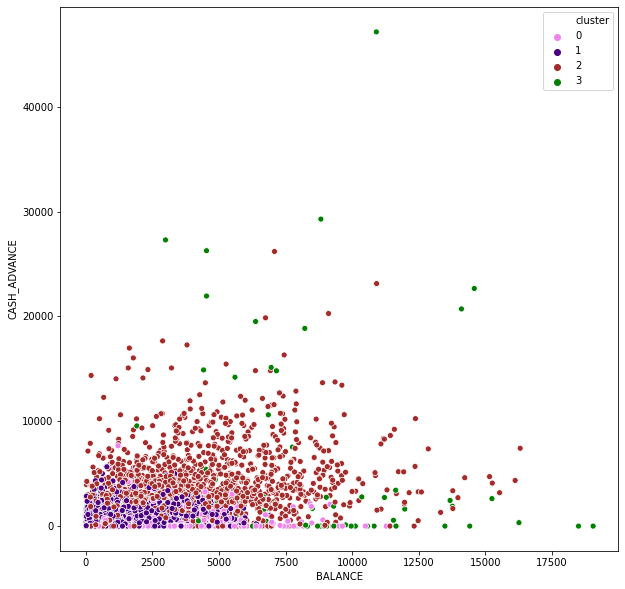

In [262]:
# Balance vs Cash Advance with clusters

plt.figure(figsize=(10,10))
ax1 = sns.scatterplot(x = 'BALANCE', y = 'CASH_ADVANCE', hue = 'cluster', data = creditcard_df_predictedcluster, palette = ['violet','indigo','brown','green'])

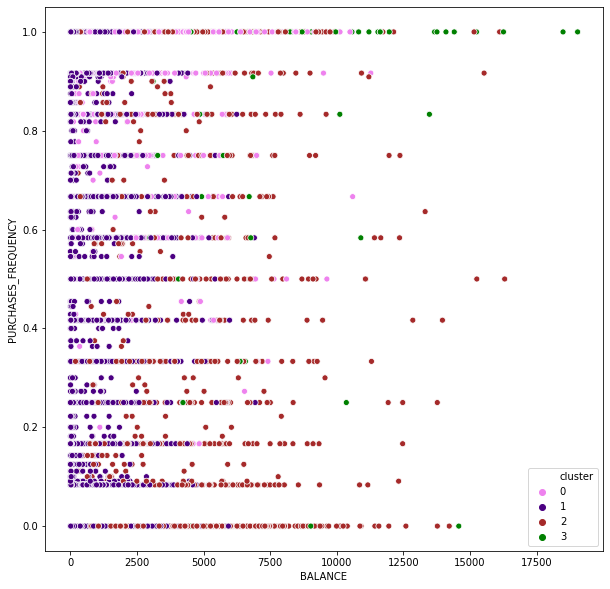

In [263]:
# Balance vs Purchase frequency with clusters

plt.figure(figsize=(10,10))
ax1 = sns.scatterplot(x = 'BALANCE', y = 'PURCHASES_FREQUENCY', hue = 'cluster', data = creditcard_df_predictedcluster, palette = ['violet','indigo','brown','green'])

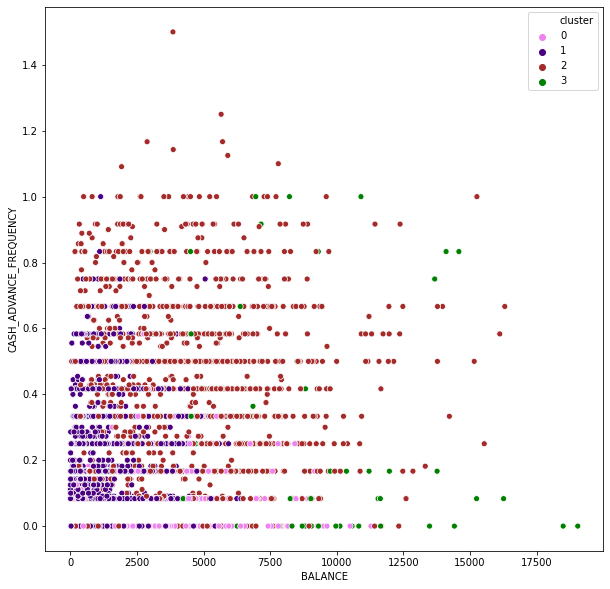

In [264]:
# Balance vs Cash Advance frequency with clusters

plt.figure(figsize=(10,10))
ax1 = sns.scatterplot(x = 'BALANCE', y = 'CASH_ADVANCE_FREQUENCY', hue = 'cluster', data = creditcard_df_predictedcluster, palette = ['violet','indigo','brown','green'])

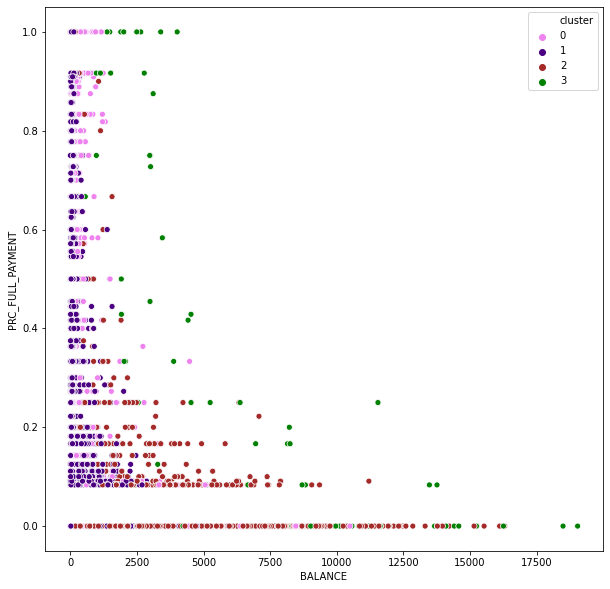

In [265]:
# Balance vs Purchase percent of full payment with clusters

plt.figure(figsize=(10,10))
ax1 = sns.scatterplot(x = 'BALANCE', y = 'PRC_FULL_PAYMENT', hue = 'cluster', data = creditcard_df_predictedcluster, palette = ['violet','indigo','brown','green'])

In [266]:
# PCA is performed for dimentionality reduction ie from 17 to 2

pca = PCA(n_components=2)
principal_compon = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = principal_compon, columns = ['pca1', 'pca2'])

In [267]:
# Concatenating cluster value to pca dataframe

pca_df = pd.concat([pca_df, pd.DataFrame({'clusters':labels})], axis=1)

In [268]:
pca_df.head()

,pca1,pca2,clusters
0,-1.982825,0.023968,1
1,1.816235,-1.598989,2
2,0.873171,0.235086,0
3,0.567684,-0.218624,1
4,-1.728083,-0.124378,1


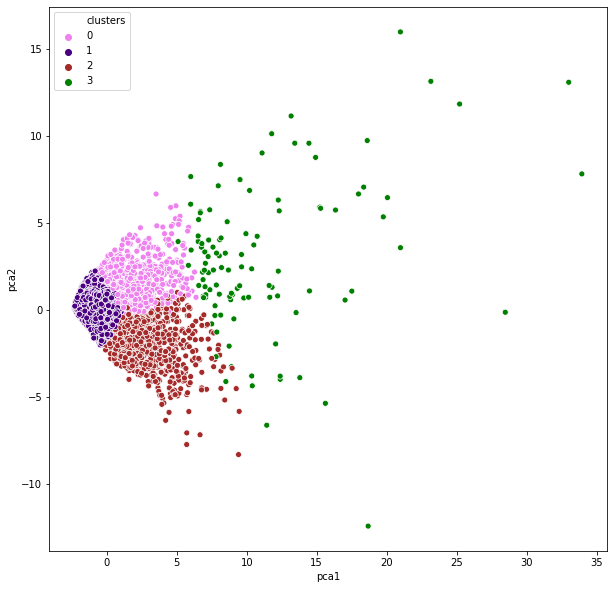

In [269]:
# pca1 v/s pca2 to observe clusters graphically

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'clusters', data = pca_df, palette = ['violet','indigo','brown','green'])

In [270]:
cluster1_df.shape

(1324, 18)

In [271]:
cluster2_df.shape

(6186, 18)

In [272]:
cluster3_df.shape

(1330, 18)

In [273]:
cluster4_df.shape

(110, 18)

# Result

All 8950 customers can be divided into 4 major categories:
1. **Alienated (BLUE-6186 customers)**: *Low Balance, Low Purchase*. These customers show low Cash Advance payment, low OneOff Purhase & low percent of full payment
2. **Roamers (RED-1330 customers)**: Medium - *high Balance, Low Purchase*. These customers show medium cash advance payment but low purchse frequency
3. **Supporters (PINK-1324 customers)**: *Low Balance, High Purchase*. These customers show minimum cash advance, low cash advance frequency but high purchase frequency
4. **Fans (GREEN-110 customers)**: *HIgh Purchase*. They show high one off purchases, high cash advance, plus maximum percent of full payment